# Exploración de datos

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar datos
df = pd.read_csv("Resultados_Saber11_2018.csv")

# Variables numéricas
num_vars = [
    'EDAD',
    'PUNT_MATEMATICAS',
    'PUNT_LECTURA_CRITICA',
    'PUNT_C_NATURALES',
    'PUNT_SOCIALES_CIUDADANAS',
    'PUNT_INGLES',
    'PUNT_GLOBAL'
]

# Variables categóricas que pueden ser útiles para visualizar
cat_vars = [
    'ESTU_GENERO',
    'FAMI_ESTRATOVIVIENDA',
    'COLE_CARACTER',
    'COLE_JORNADA',
    'FAMI_TIENEINTERNET'
]


In [16]:
desc_stats = df[num_vars].describe().T
desc_stats

,count,mean,std,min,25%,50%,75%,max
EDAD,30134.0,17.843731,1.030790,14.0,17.0,18.0,18.0,22.0
PUNT_MATEMATICAS,30134.0,60.446240,13.246593,21.0,51.0,62.0,70.0,100.0
PUNT_LECTURA_CRITICA,30134.0,61.859859,10.029193,33.0,55.0,63.0,69.0,84.0
PUNT_C_NATURALES,30134.0,59.540287,11.427404,27.0,52.0,61.0,68.0,82.0
PUNT_SOCIALES_CIUDADANAS,30134.0,59.085684,12.267087,26.0,51.0,61.0,68.0,85.0
PUNT_INGLES,30134.0,66.195029,16.097953,22.0,54.0,68.0,80.0,100.0
PUNT_GLOBAL,30134.0,303.457656,55.602514,142.0,263.0,312.0,348.0,427.0


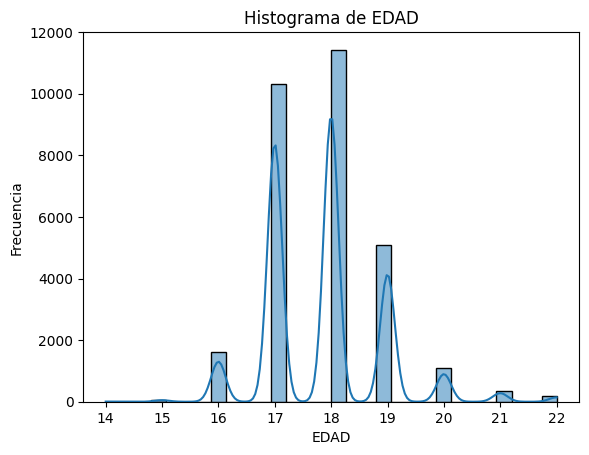

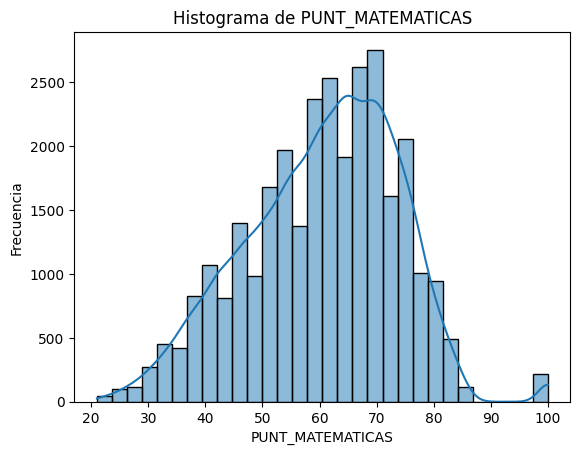

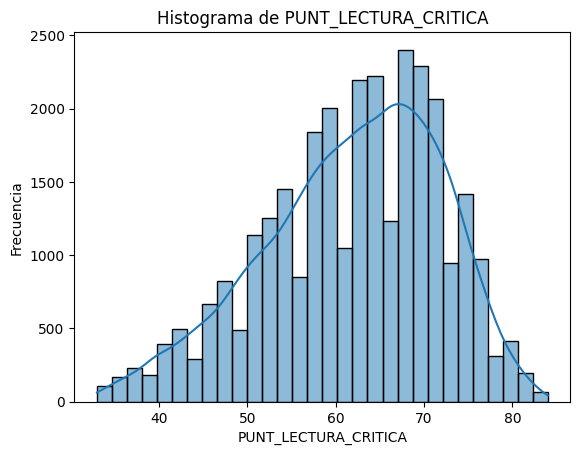

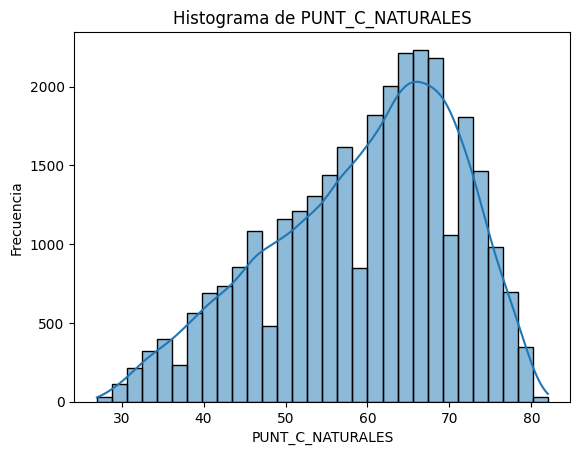

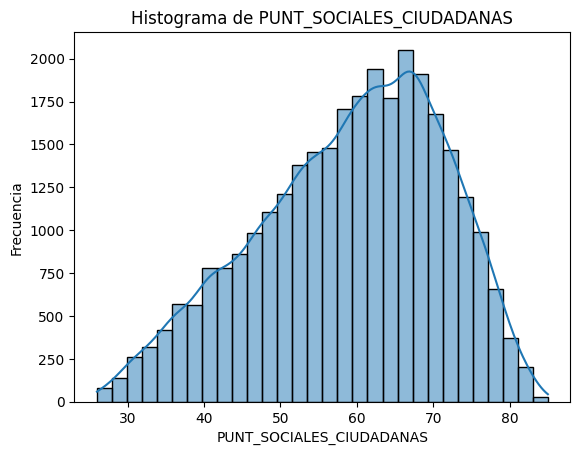

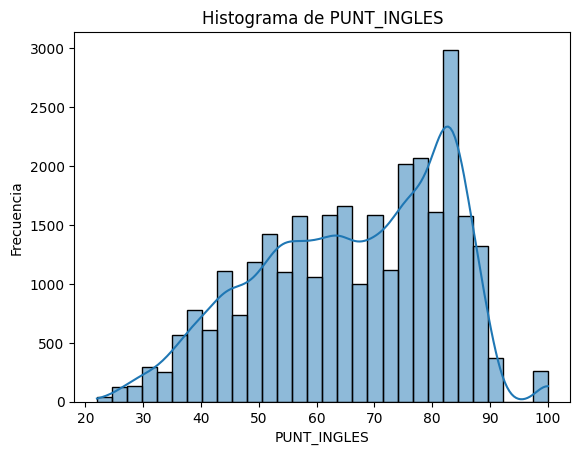

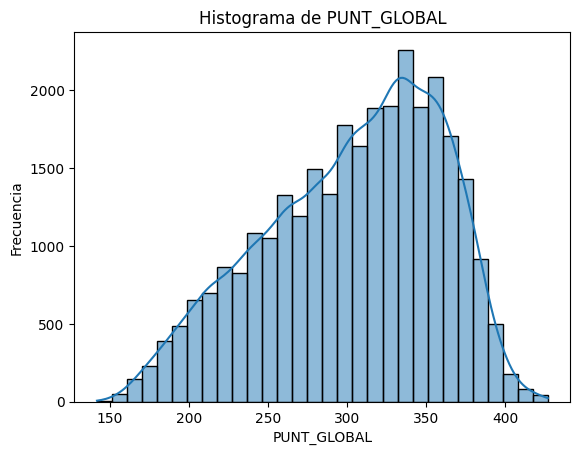

In [22]:
for col in num_vars:
    plt.figure()
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Histograma de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.show()



In [24]:
print(df.columns.tolist())


['ESTU_FECHANACIMIENTO', 'PUNT_MATEMATICAS', 'PUNT_LECTURA_CRITICA', 'PUNT_C_NATURALES', 'PUNT_SOCIALES_CIUDADANAS', 'PUNT_INGLES', 'PUNT_GLOBAL', 'AÑO_NACIMIENTO', 'EDAD', 'ESTU_GENERO_M', 'COLE_AREA_UBICACION_URBANO', 'COLE_CARACTER_NO APLICA', 'COLE_CARACTER_TÉCNICO', 'COLE_CARACTER_TÉCNICO/ACADÉMICO', 'COLE_JORNADA_MAÑANA', 'COLE_JORNADA_NOCHE', 'COLE_JORNADA_SABATINA', 'COLE_JORNADA_TARDE', 'COLE_JORNADA_UNICA', 'ESTU_DEPTO_RESIDE_ARAUCA', 'ESTU_DEPTO_RESIDE_ATLANTICO', 'ESTU_DEPTO_RESIDE_BOGOTÁ', 'ESTU_DEPTO_RESIDE_BOLIVAR', 'ESTU_DEPTO_RESIDE_BOYACA', 'ESTU_DEPTO_RESIDE_CALDAS', 'ESTU_DEPTO_RESIDE_CAQUETA', 'ESTU_DEPTO_RESIDE_CASANARE', 'ESTU_DEPTO_RESIDE_CAUCA', 'ESTU_DEPTO_RESIDE_CESAR', 'ESTU_DEPTO_RESIDE_CHOCO', 'ESTU_DEPTO_RESIDE_CORDOBA', 'ESTU_DEPTO_RESIDE_CUNDINAMARCA', 'ESTU_DEPTO_RESIDE_GUAINIA', 'ESTU_DEPTO_RESIDE_GUAVIARE', 'ESTU_DEPTO_RESIDE_HUILA', 'ESTU_DEPTO_RESIDE_LA GUAJIRA', 'ESTU_DEPTO_RESIDE_MAGDALENA', 'ESTU_DEPTO_RESIDE_META', 'ESTU_DEPTO_RESIDE_NARIÑO', '

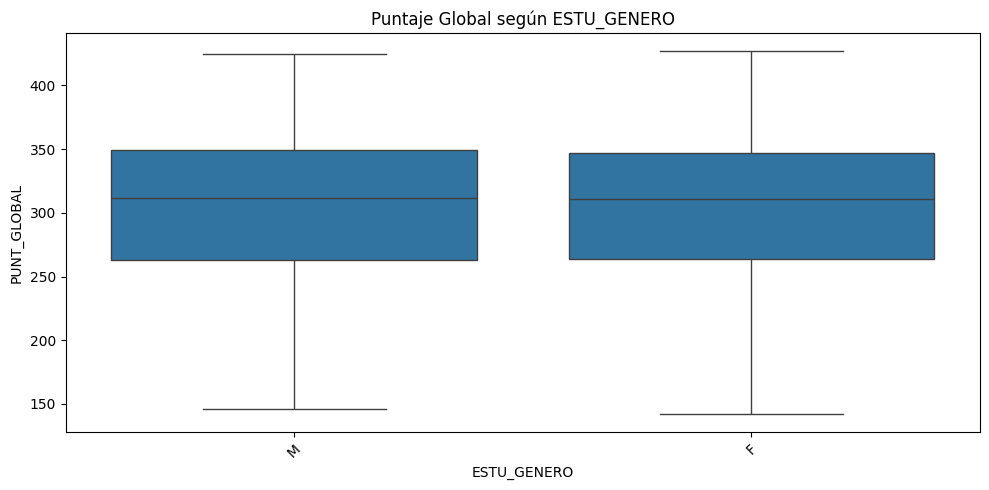

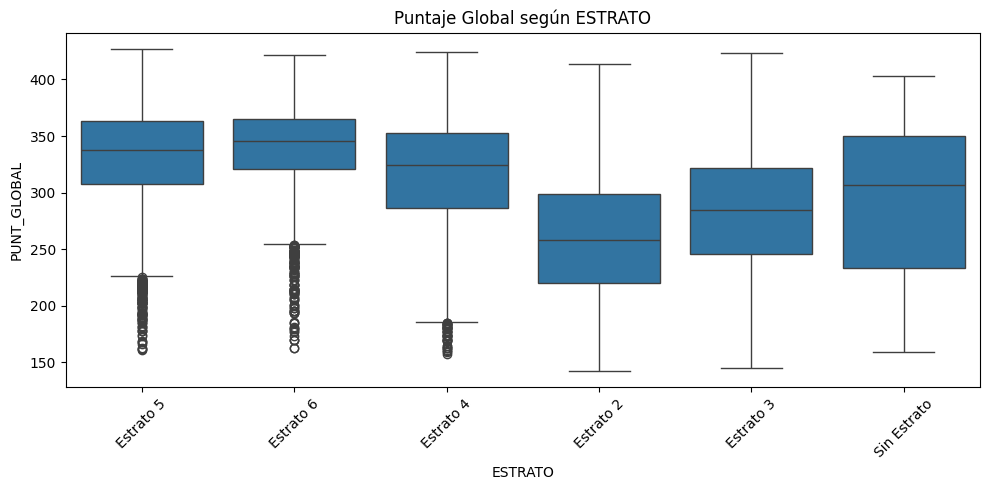

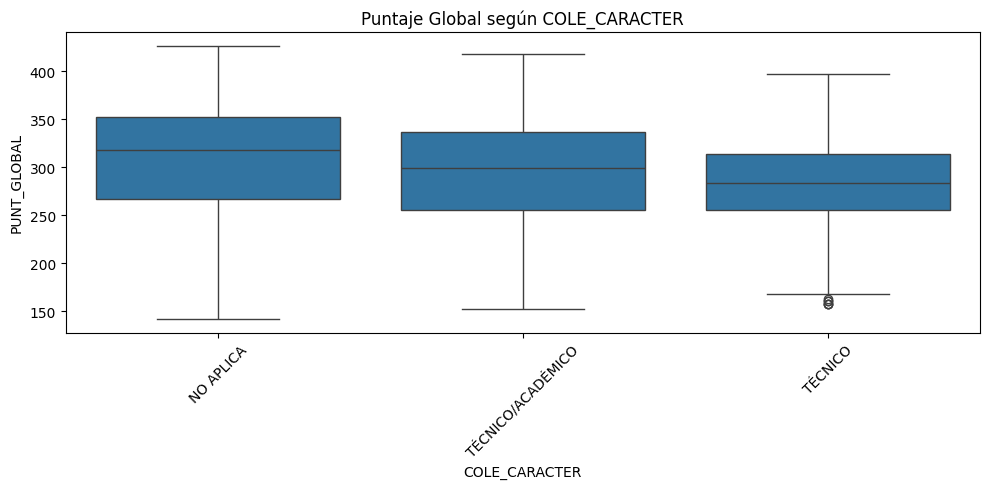

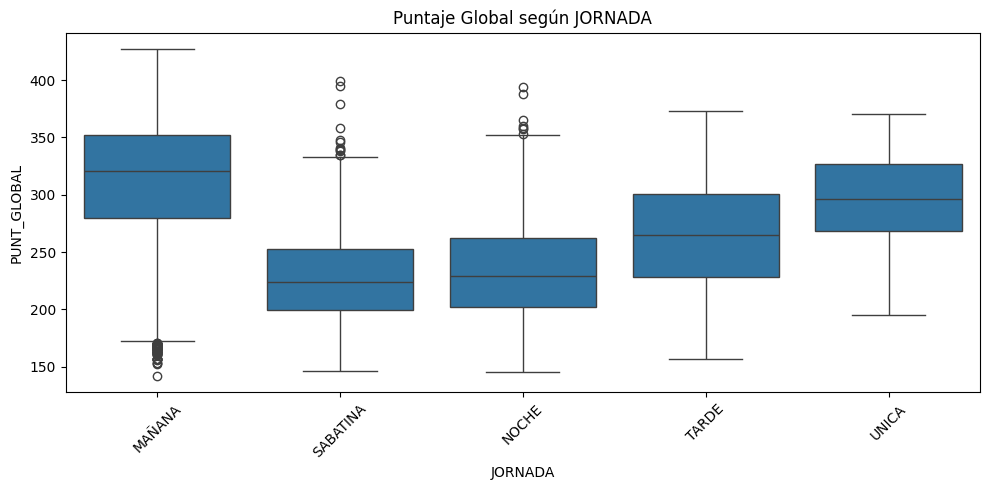

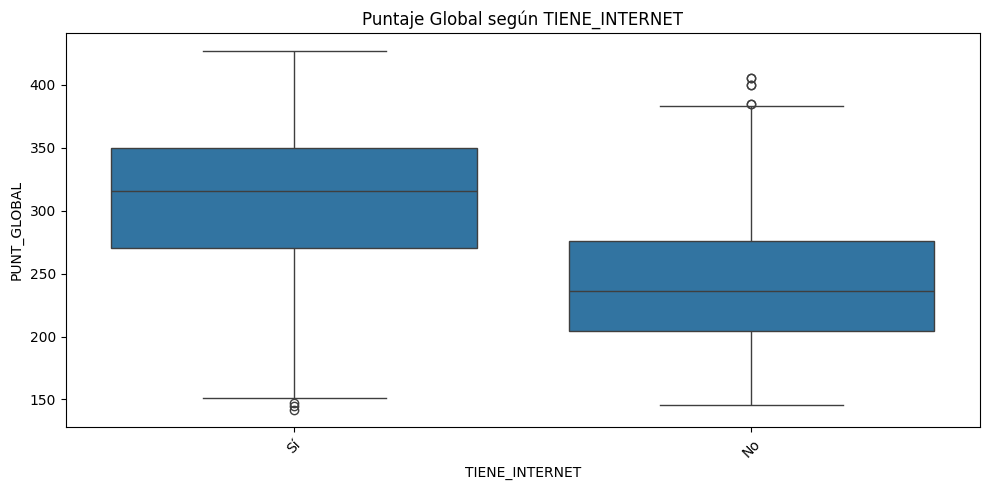

In [25]:
df['ESTU_GENERO'] = df['ESTU_GENERO_M'].apply(lambda x: 'M' if x == 1 else 'F')
# Agrupar columnas que empiezan con 'COLE_CARACTER'
cols_caracter = [col for col in df.columns if col.startswith('COLE_CARACTER')]
df['COLE_CARACTER'] = df[cols_caracter].idxmax(axis=1).str.replace('COLE_CARACTER_', '')
cols_estrato = [col for col in df.columns if col.startswith('FAMI_ESTRATOVIVIENDA')]
df['ESTRATO'] = df[cols_estrato].idxmax(axis=1).str.replace('FAMI_ESTRATOVIVIENDA_', '')
cols_jornada = [col for col in df.columns if col.startswith('COLE_JORNADA')]
df['JORNADA'] = df[cols_jornada].idxmax(axis=1).str.replace('COLE_JORNADA_', '')
df['TIENE_INTERNET'] = df['FAMI_TIENEINTERNET_Si'].apply(lambda x: 'Sí' if x == 1 else 'No')
cat_vars = ['ESTU_GENERO', 'ESTRATO', 'COLE_CARACTER', 'JORNADA', 'TIENE_INTERNET']

for cat in cat_vars:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=cat, y='PUNT_GLOBAL', data=df)
    plt.title(f'Puntaje Global según {cat}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

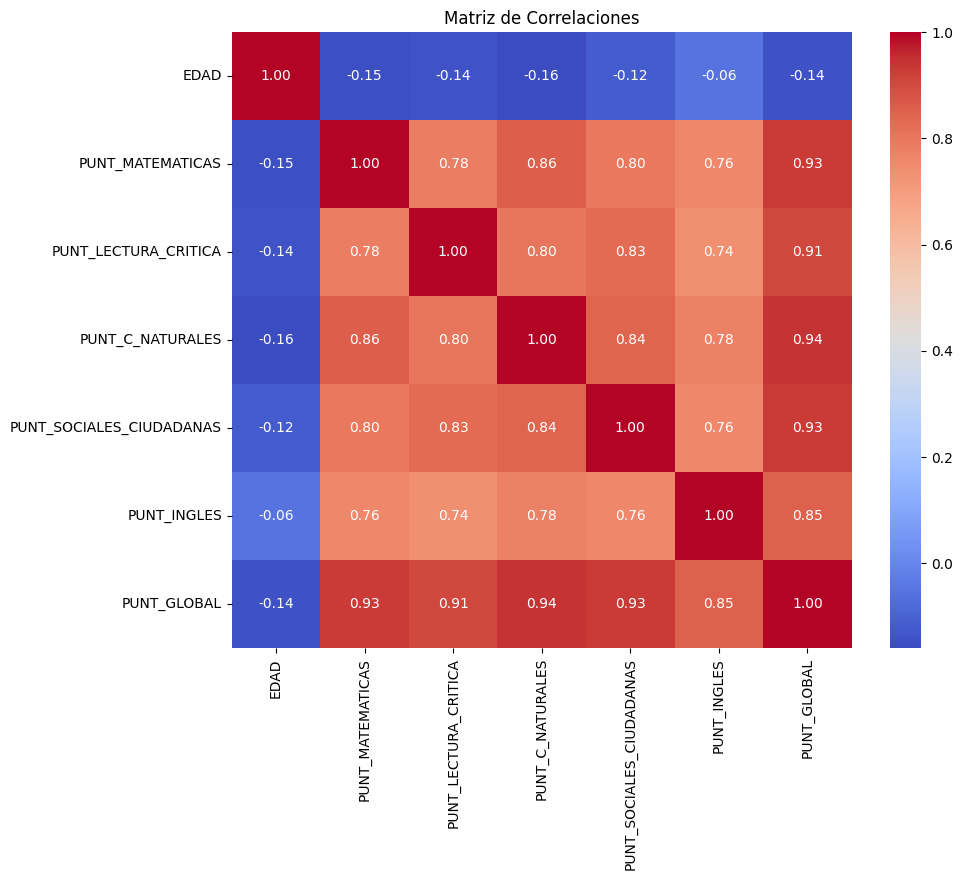

In [26]:
plt.figure(figsize=(10, 8))
corr = df[num_vars].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlaciones")
plt.show()



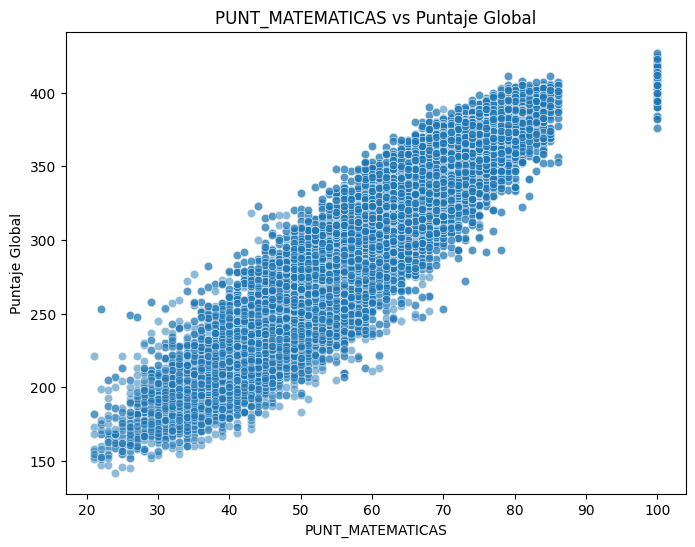

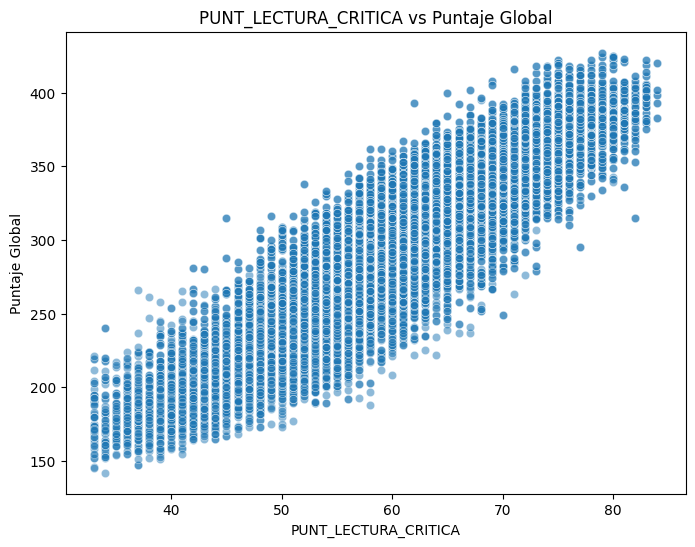

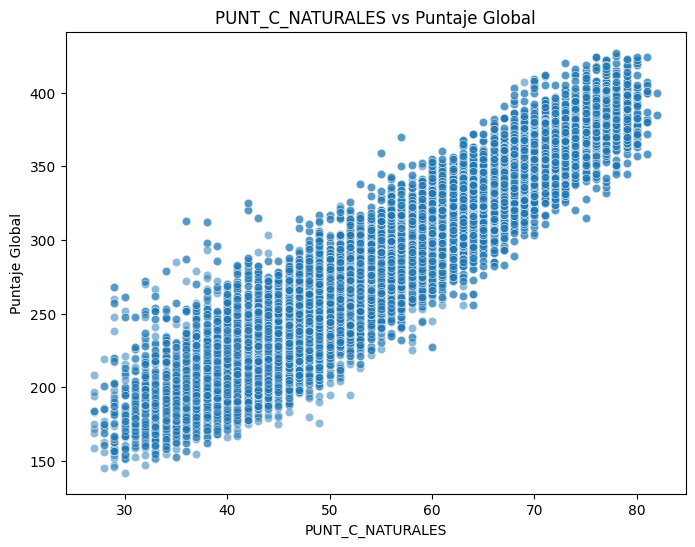

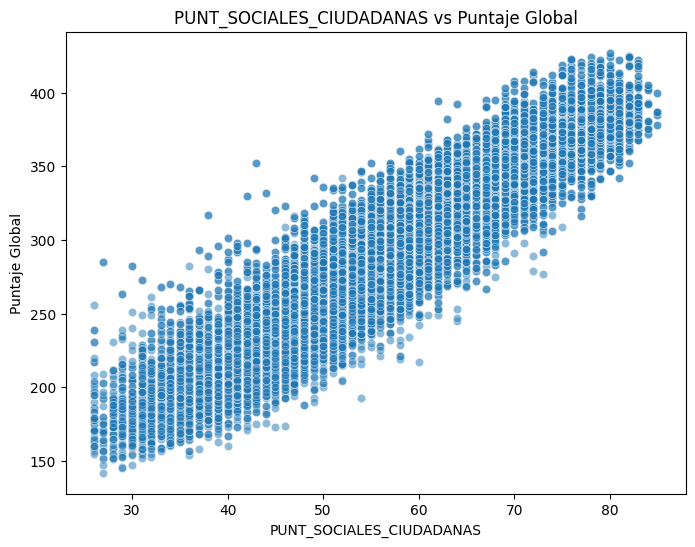

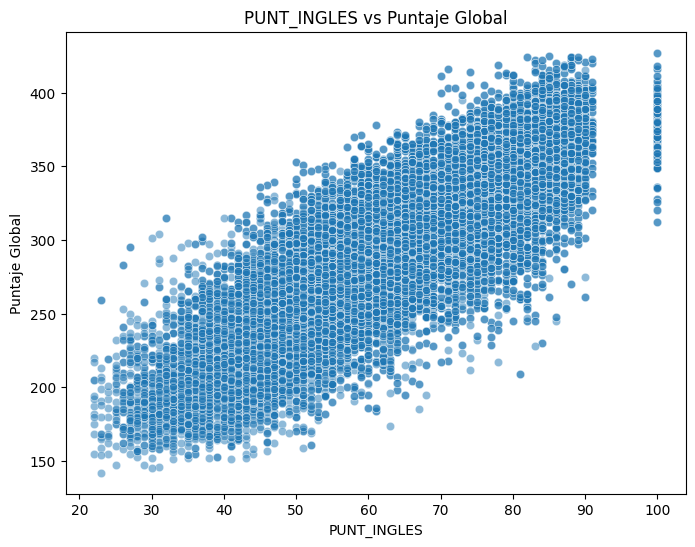

In [27]:
materias = [
    'PUNT_MATEMATICAS',
    'PUNT_LECTURA_CRITICA',
    'PUNT_C_NATURALES',
    'PUNT_SOCIALES_CIUDADANAS',
    'PUNT_INGLES'
]

for materia in materias:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=df[materia], y=df['PUNT_GLOBAL'], alpha=0.5)
    plt.title(f'{materia} vs Puntaje Global')
    plt.xlabel(materia)
    plt.ylabel('Puntaje Global')
    plt.show()



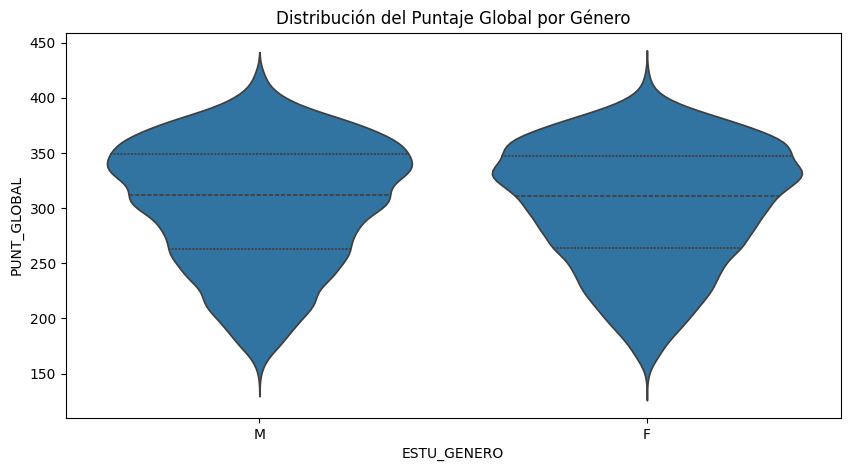

In [28]:
plt.figure(figsize=(10, 5))
sns.violinplot(x='ESTU_GENERO', y='PUNT_GLOBAL', data=df, inner='quartile')
plt.title("Distribución del Puntaje Global por Género")
plt.show()
